# Brief Description of the Data
This a purchase data from customer collect for 2 year time. It presents number of days  that each cusomer has visited and or not puchase certain brand item in specific quantity 

https://www.visualcapitalist.com/black-swan-events-short-term-crisis-long-term-opportunity/

# Libraries

In [1]:
# Standard DataScience libraries
# Numpy linear algebra; and Pandas for data manipulation
import numpy as np
import pandas as pd

# For Standardisation, clustering and dimensionality reductiion repectively
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# To read pickle files
import pickle


import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Data Import

In [2]:
df_purchase = pd.read_csv('purchase data.csv')

# Data Exploration

In [3]:
df_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [4]:
df_purchase.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

# Segmentation

## Import Segmentation Model

In [5]:
scaler = pickle.load(open('..\Asegmentation\scaler.pickle', 'rb'))

In [6]:
pca = pickle.load(open('..\Asegmentation\pca.pickle', 'rb'))

In [7]:
kmeans_pca = pickle.load(open('..\Asegmentation\kmeans_pca.pickle', 'rb'))

## Standardization

In [8]:
features =  df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)

## PCA

In [9]:
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)

## K-means  PCA

In [10]:
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

###### Data Frame Predictors

In [11]:
df_purchase_predictors =  df_purchase.copy()

In [12]:
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca

In [13]:
df_purchase_predictors

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,1
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,1
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,1
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,1
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,200000500,703,0,0,0,2,1,1.41,1.85,2.01,...,0,0,0,0,42,1,120946,1,0,1
58689,200000500,710,0,0,0,0,0,1.36,1.84,2.09,...,0,0,0,0,42,1,120946,1,0,1
58690,200000500,717,0,0,0,0,0,1.50,1.80,2.14,...,0,0,0,0,42,1,120946,1,0,1
58691,200000500,722,1,2,3,0,0,1.51,1.82,2.09,...,0,0,0,0,42,1,120946,1,0,1


# Descriptive Analysis by Segments
### Data Analysis by Customer

In [14]:
df_purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,1
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,1
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,1
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,1
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,1


In [15]:
# Temporary variable, temp1, to count shop Visits
temp1 =  df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index = False).count()
temp1 = temp1.set_index('ID')
temp1 =  temp1.rename(columns = {'Incidence': 'N_Visits'})
temp1.head()

,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [16]:
# Temporary variable, temp2, count amount of purchase of item of interest (cholate bars)
temp2 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index =  False).sum()
temp2 = temp2.set_index('ID')
temp2 = temp2.rename(columns = {'Incidence': 'N_Purchases'})
temp2.head()

,N_Purchases
ID,
200000001,9
200000002,11
200000003,10
200000004,11
200000005,13


In [17]:
# Join temp1 and temp2 = temp3
temp3 =  temp1.join(temp2)
temp3.head()

,N_Visits,N_Purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [18]:
# Average number of purchases
temp3['Average_N_Purchases'] = temp3['N_Purchases'] / temp3['N_Visits']
temp3.head()

,N_Visits,N_Purchases,Average_N_Purchases
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [19]:
# Getting the Segment of each customer. Here, with groubpy it will give us exact same cluster 
temp4 = df_purchase_predictors[['ID', 'Segment']].groupby(['ID'], as_index =  False).mean()
temp4 = temp4.set_index('ID')

# Join temp3 and temp4 = df_purchase_descr
df_purchase_descr =  temp3.join(temp4)
df_purchase_descr.head()

,N_Visits,N_Purchases,Average_N_Purchases,Segment
ID,,,,
200000001,101,9,0.089109,1
200000002,87,11,0.126437,0
200000003,97,10,0.103093,1
200000004,85,11,0.129412,1
200000005,111,13,0.117117,3


### Segment Proportions
It is dificult ot analysis customer individually. So, the best approach would be analysing cluster behaviour. Therefore, we have gotten the folllowing procedure.


In [20]:
# Segments proportion
segm_prop =  df_purchase_descr[['N_Purchases', 'Segment']].groupby(['Segment']).count() / df_purchase_descr.shape[0]
segm_prop = segm_prop.rename(columns = {'N_Purchases': 'Segment Proportions'})
segm_prop

,Segment Proportions
Segment,
0,0.196
1,0.376
2,0.208
3,0.220


Text(0.5, 1.0, 'Segmentation Proportions')

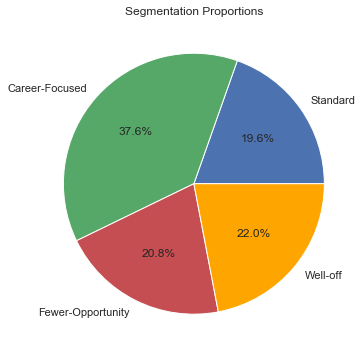

In [21]:
plt.figure(figsize = (9, 6))
plt.pie(segm_prop['Segment Proportions'],
       labels = ['Standard', 'Career-Focused', 'Fewer-Opportunity', 'Well-off'],
       autopct = '%1.1f%%',
       colors = ('b', 'g', 'r', 'orange'))
plt.title('Segmentation Proportions')

__Obs__

This quite good. The reality is that
- 37.6% - Fewer Opportunity
- 22.0% - Career-Focused
- 20.8% - Standard
- 19.6% - Well-off

In [22]:
labels = ['Well-off', 'Fewer-Opportunity', 'Standard', 'Career-Focused']

Text(0.5, 1.0, 'Segmentation Proportions')

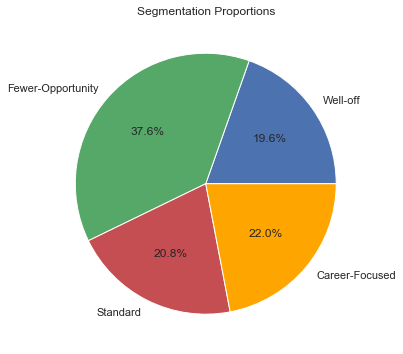

In [23]:
plt.figure(figsize = (9, 6))
plt.pie(segm_prop['Segment Proportions'],
       labels = ['Well-off', 'Fewer-Opportunity', 'Standard', 'Career-Focused'],
       autopct = '%1.1f%%',
       colors = ('b', 'g', 'r', 'orange'))
plt.title('Segmentation Proportions')

## Purchase Occasion and Purchase Incidence
- How often people from different segments visited the store
- How did they buy the product and of the brand

To answers these question we are going to calculate Means and Standard Deviation of the Data Frame for each Clusters

In [24]:
segments_mean = df_purchase_descr.groupby(['Segment']).mean()
segments_mean

,N_Visits,N_Purchases,Average_N_Purchases
Segment,,,
0,117.295918,34.602041,0.284478
1,113.835106,22.792553,0.201755
2,117.471154,24.817308,0.212364
3,123.454545,39.827273,0.283102


In [25]:
segments_std = df_purchase_descr.groupby(['Segment']).std()
segments_std

,N_Visits,N_Purchases,Average_N_Purchases
Segment,,,
0,20.716152,25.900579,0.171787
1,16.390601,13.843068,0.120634
2,19.088937,16.715648,0.126056
3,44.864656,53.744530,0.200056


Text(0.5, 1.0, 'Average Number of Store Visits by Segment')

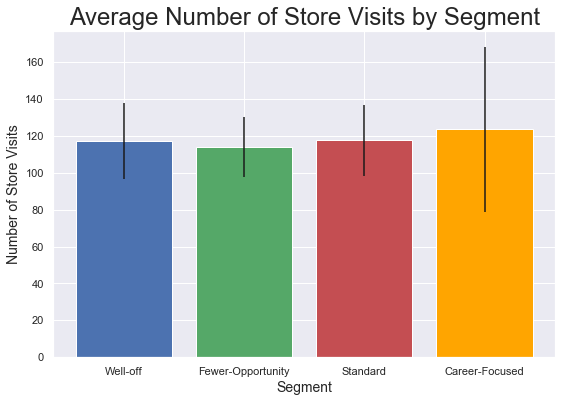

In [26]:
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2, 3),
       tick_label = ('Well-off', 'Fewer-Opportunity', 'Standard', 'Career-Focused'),
       height =  segments_mean['N_Visits'], 
       yerr =  segments_std['N_Visits'],
       color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segment', fontsize = 14)
plt.ylabel('Number of Store Visits', fontsize = 14)
plt.title('Average Number of Store Visits by Segment', fontsize = 24)

Text(0.5, 1.0, 'Number of Purchases Indences')

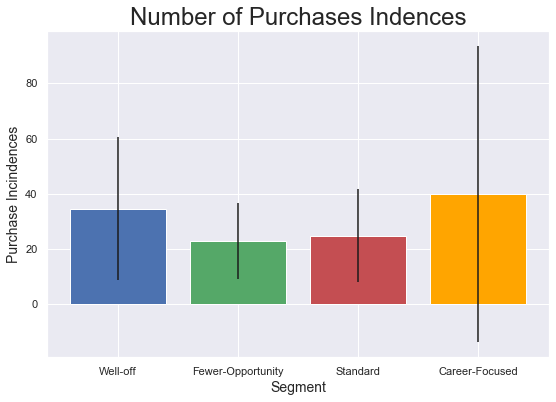

In [27]:
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2, 3),
       tick_label = ('Well-off', 'Fewer-Opportunity', 'Standard', 'Career-Focused'),
       height =  segments_mean['N_Purchases'], 
       yerr =  segments_std['N_Purchases'],
       color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segment', fontsize = 14)
plt.ylabel('Purchase Incindences', fontsize = 14)
plt.title('Number of Purchases Indences', fontsize = 24)

Text(0.5, 1.0, 'Average Number of Purchases')

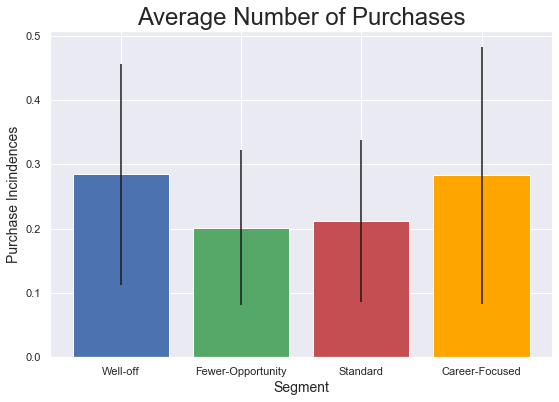

In [28]:
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2, 3),
       tick_label = ('Well-off', 'Fewer-Opportunity', 'Standard', 'Career-Focused'),
       height =  segments_mean['Average_N_Purchases'], 
       yerr =  segments_std['Average_N_Purchases'],
       color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segment', fontsize = 14)
plt.ylabel('Purchase Incindences', fontsize = 14)
plt.title('Average Number of Purchases', fontsize = 24)

## Brand Choice

In [29]:
df_purchase_incidence = df_purchase_predictors[df_purchase_predictors['Incidence'] == 1]

In [30]:
brand_dummies = pd.get_dummies(df_purchase_incidence['Brand'], prefix = 'Brand', prefix_sep = '_')
brand_dummies['Segment'], brand_dummies['ID'] =df_purchase_incidence['Segment'], df_purchase_incidence['ID']
brand_dummies

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
6,0,1,0,0,0,1,200000001
11,0,0,0,0,1,1,200000001
19,1,0,0,0,0,1,200000001
24,0,0,0,1,0,1,200000001
29,0,1,0,0,0,1,200000001
...,...,...,...,...,...,...,...
58621,0,1,0,0,0,1,200000500
58648,1,0,0,0,0,1,200000500
58674,0,1,0,0,0,1,200000500
58687,0,1,0,0,0,1,200000500


In [31]:
temp =  brand_dummies.groupby(['ID'], as_index = True).mean()
temp.head()

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment
ID,,,,,,
200000001,0.111111,0.444444,0.0,0.222222,0.222222,1
200000002,0.000000,0.090909,0.0,0.909091,0.000000,0
200000003,0.000000,0.800000,0.0,0.000000,0.200000,1
200000004,0.000000,0.090909,0.0,0.000000,0.909091,1
200000005,0.000000,0.000000,0.0,0.000000,1.000000,3


In [32]:
mean_brand_choice = temp.groupby(['Segment'], as_index = True).mean()
mean_brand_choice.head()

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
Segment,,,,,
0,0.041928,0.117422,0.030610,0.613623,0.196417
1,0.138299,0.679494,0.021034,0.061875,0.099298
2,0.248771,0.402305,0.154976,0.058902,0.135045
3,0.072871,0.146808,0.039976,0.112395,0.627951


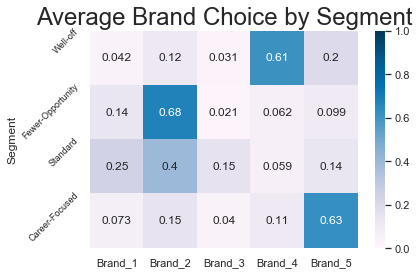

In [33]:
sns.heatmap(mean_brand_choice,
           vmin = 0,
           vmax = 1,
           cmap = 'PuBu',
           annot = True)
plt.yticks([0, 1, 2, 3], ['Well-off', 'Fewer-Opportunity', 'Standard', 'Career-Focused'], rotation = 45, fontsize = 9)
plt.title('Average Brand Choice by Segment', fontsize = 24)
plt.show()

# Revenue

In [34]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 1]
temp.loc[:, 'Revenue Brand 1'] = temp['Price_1'] * temp['Quantity']
segments_brand_revenue =  pd.DataFrame()
segments_brand_revenue[['Segment', 'Revenue Brand 1']] = temp[['Segment', 'Revenue Brand 1']].groupby(['Segment'], as_index = False).sum()
segments_brand_revenue

C:\Users\lmanu\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\lmanu\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Segment,Revenue Brand 1
0,0,699.47
1,1,2258.90
2,2,2611.19
3,3,736.09


In [35]:
# For Revenue 2
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 2]
temp.loc[:, 'Revenue Brand 2'] = temp['Price_2'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 2']] = temp[['Segment', 'Revenue Brand 2']].groupby(['Segment'], as_index = False).sum()

C:\Users\lmanu\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\lmanu\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [36]:
# For Revenue 3
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 3]
temp.loc[:, 'Revenue Brand 3'] = temp['Price_3'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 3']] = temp[['Segment', 'Revenue Brand 3']].groupby(['Segment'], as_index = False).sum()

In [37]:
# For Revenue 4
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 4]
temp.loc[:, 'Revenue Brand 4'] = temp['Price_4'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 4']] = temp[['Segment', 'Revenue Brand 4']].groupby(['Segment'], as_index = False).sum()
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4
0,0,699.47,1298.23,731.35,14185.57
1,1,2258.90,13868.30,716.25,1629.31
2,2,2611.19,4855.36,3909.17,861.38
3,3,736.09,1746.42,664.75,2363.84


In [38]:
# For Revenue 4
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 5]
temp.loc[:, 'Revenue Brand 5'] = temp['Price_5'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 5']] = temp[['Segment', 'Revenue Brand 5']].groupby(['Segment'], as_index = False).sum()
segments_brand_revenue

C:\Users\lmanu\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\lmanu\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5
0,0,699.47,1298.23,731.35,14185.57,5509.69
1,1,2258.90,13868.30,716.25,1629.31,2230.50
2,2,2611.19,4855.36,3909.17,861.38,2439.75
3,3,736.09,1746.42,664.75,2363.84,19441.06


In [39]:
segments_brand_revenue.index = ['Well-off', 'Fewer-Opportunity', 'Standard', 'Career-Focused']
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5
Well-off,0,699.47,1298.23,731.35,14185.57,5509.69
Fewer-Opportunity,1,2258.90,13868.30,716.25,1629.31,2230.50
Standard,2,2611.19,4855.36,3909.17,861.38,2439.75
Career-Focused,3,736.09,1746.42,664.75,2363.84,19441.06


In [40]:
segments_brand_revenue['Total Revenue'] = (segments_brand_revenue['Revenue Brand 1'] +
                                          segments_brand_revenue['Revenue Brand 2'] +
                                          segments_brand_revenue['Revenue Brand 3'] +
                                          segments_brand_revenue['Revenue Brand 4'] +
                                          segments_brand_revenue['Revenue Brand 5'])

segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue
Well-off,0,699.47,1298.23,731.35,14185.57,5509.69,22424.31
Fewer-Opportunity,1,2258.90,13868.30,716.25,1629.31,2230.50,20703.26
Standard,2,2611.19,4855.36,3909.17,861.38,2439.75,14676.85
Career-Focused,3,736.09,1746.42,664.75,2363.84,19441.06,24952.16


In [41]:
segments_brand_revenue['Segment Proportions'] = segm_prop['Segment Proportions'].values
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment Proportions
Well-off,0,699.47,1298.23,731.35,14185.57,5509.69,22424.31,0.196
Fewer-Opportunity,1,2258.90,13868.30,716.25,1629.31,2230.50,20703.26,0.376
Standard,2,2611.19,4855.36,3909.17,861.38,2439.75,14676.85,0.208
Career-Focused,3,736.09,1746.42,664.75,2363.84,19441.06,24952.16,0.220


In [42]:
segm_prop['Segment Proportions'].values

array([0.196, 0.376, 0.208, 0.22 ])